In [51]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from collections import Counter

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

#data-visualization
import seaborn as sns

In [67]:
df  = pd.read_csv(r'covid_19_data.csv', header =0)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935 entries, 0 to 4934
Data columns (total 8 columns):
SNo                4935 non-null int64
ObservationDate    4935 non-null object
Province/State     3120 non-null object
Country/Region     4935 non-null object
Last Update        4935 non-null object
Confirmed          4935 non-null int64
Deaths             4935 non-null int64
Recovered          4935 non-null int64
dtypes: int64(4), object(4)
memory usage: 308.6+ KB


In [69]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [55]:
df.dropna(inplace=True)
print(Counter(df['Province/State'].values).most_common(5))

[('Gansu', 51), ('Hebei', 51), ('Anhui', 50), ('Beijing', 50), ('Chongqing', 50)]


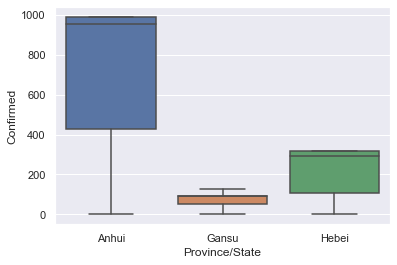

In [71]:
mostCommon = df[df['Province/State'].isin(['Gansu', 'Hebei', 'Anhui'])]
sns.boxplot(x= mostCommon['Province/State'], y = df['Confirmed'])
plt.show()

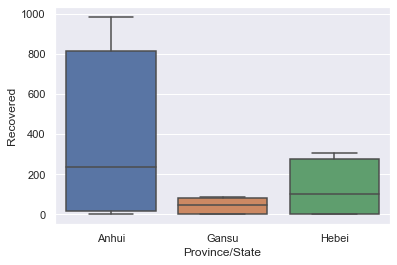

In [81]:
mostCommon = df[df['Province/State'].isin(['Gansu', 'Hebei', 'Anhui'])]
sns.boxplot(x= mostCommon['Province/State'], y = df['Recovered'])
plt.show()

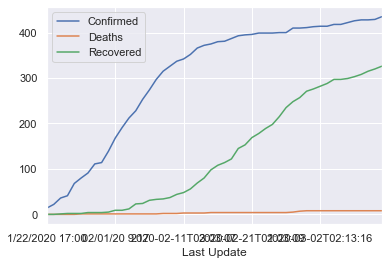

In [100]:
Beijing =  df[df['Province/State'] == 'Beijing']
Beijing = Beijing.drop(['SNo'], axis='columns')
Beijing.set_index('Last Update').plot()

In [97]:
print(Counter(df['Country/Region'].values).most_common(5))

[('Mainland China', 1548), ('US', 1003), ('Australia', 225), ('Canada', 146), ('Taiwan', 50)]


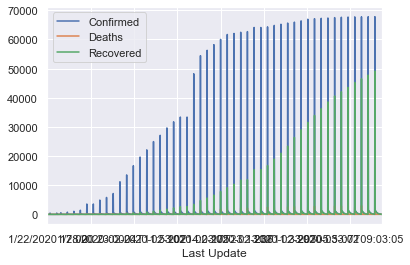

In [154]:
China =  df[df['Country/Region'] == 'Mainland China']
China = China.drop(['SNo'], axis='columns')
China.set_index('Last Update').plot()

# Random Forest

In [145]:
Confirmed = df['Confirmed']
features = df.iloc[:,5:8]
X_train, X_test, y_train, y_test = train_test_split(features, Confirmed)
X_train.shape, X_test.shape

((3701, 3), (1234, 3))

In [146]:
modelRF = RandomForestRegressor()

In [147]:
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.99833753 0.99666818 0.9998993 ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9998485795280065

In [148]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.997
RMSE: 264.692


In [149]:
Recovered = df['Recovered']
features = df.iloc[:,5:8]
X_train, X_test, y_train, y_test = train_test_split(features, Recovered)
X_train.shape, X_test.shape

((3701, 3), (1234, 3))

In [150]:
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.99686606 0.99633873 0.99064367]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9990922436639266

In [151]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.999
RMSE: 76.308


# Linear Regression

In [158]:
Confirmed = df['Confirmed']
features = df.iloc[:,5:8]
X_train, X_test, y_train, y_test = train_test_split(features, Confirmed)
X_train.shape, X_test.shape

((3701, 3), (1234, 3))

In [159]:
modelLR = LinearRegression()

In [160]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train))
modelLR.score(X_train,y_train)

[1. 1. 1.]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


1.0

In [161]:
#Make Predictions
predictions = modelLR.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 1.000
RMSE: 0.000
